# Dimension reduction using PCA or t-SNE

## Introduction

Karl Pearson invented one of the most popular dimension reduction algorithms in 1901 - the  **Principal Components Analysis** (PCA). Principal Components Analysis detects the directions of highest variance and projects data to a subspace to its principal components. The dimensionality is reduced to the number of principal components, in a way that the amount of variability of the data is maximized. Distant values in high dimensional space remain distant.<sup>1</sup>

PCA may also be used to compress a dataset. For example the MNIST dataset may be compressed down to 154 dimensions, instead of 784 (28x28) dimensions, by dropping 5% variance. Also the former representation of 784 dimensions may be regained by using the reverse transformation of the PCA-projection, although some information (5% variance) is dropped.<sup>2</sup>

Another way to reduce dimensionality is **t-distributed stochastic neighbor embedding** (t-SNE). t-SNE is a non-linear way of dimension reduction. It reduces dimensionality, while trying to keep similar data in low distance to each other.

t-SNE are just two ways to do dimension reduction among many others (without going into details):
* Linear Discriminant Analysis (LDA)<sup>2</sup>
* Locally Linear Embedding (LLE)<sup>3</sup>
* ...
* Autoencoders<sup>2</sup>
* ...

## Load a sample data set


### load the MNIST dataset

Although the machine learning library scikit-learn is utilized in subsequent chapters, tensorflow Keras is utilized ot load the MNIST dataset. This is because the scikit-learn utility to load MNIST data is broken.

First of all necessary libraries are imported.

<sup>1: Heaton, J. (2015). Artificial Intelligence for humans volume 3 deep learning and neural networks. Heaton Research</sup><br>
<sup>2: Geron A., (2018). Hands-on Machine Learning with scikit-learn and tensorflow. O'Reilly</sup><br>
<sup>3: BISHOP, C. M. (2016). PATTERN RECOGNITION AND MACHINE LEARNING. S.l.: SPRINGER-VERLAG NEW YORK.</sup>

In [1]:
import tensorflow as tf
from tensorflow import keras

Then the MNISt dataset is loaded using the Keras API.

In [2]:
# load mnist dataset
mnist_dataset = keras.datasets.mnist
#mnist_dataset = keras.datasets.fashion_mnist # for fashion mnist dataset instead of classic mnist dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist_dataset.load_data()
print(mnist_train_images.shape, mnist_train_labels.shape, mnist_test_images.shape, mnist_test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


To show the structure of the MNISt dataset, some random digits are plottet below.

In [3]:
import matplotlib.pyplot as plt
from random import randint

plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    rand_digit = randint(1,10)
    ax = fig.add_subplot(3,10,i+1)
    ax.set_xlabel(('Digit ' + 'x'),y=-100.0)
    ax.matshow(mnist_train_images[rand_digit])

### reshape MNIST data

In order to be able to work with the data later, the numpy arrays are reshaped.

In [4]:
# reshape 28x28 to 784 flattened elemnts
nmb_data = 2000
X = mnist_train_images.reshape(-1,784)[:nmb_data]/255.0
y = mnist_train_labels[:nmb_data]
print(X.shape, y.shape)

(2000, 784) (2000,)


## Use PCA on MNIST data

For visual evidence a Principal Components Analysis is used to reduce the **764 dimensions** of the well known MNIST dataset **down to two dimensions**.<sup>3</sup>

<sup>3: Heaton, J. (2015). Artificial Intelligence for humans volume 3 deep learning and neural networks. Heaton Research</sup><br>

Lets use the scikit-learn implementation of the PCA. Note that the actual PCA is only one line of code. The rest of the code is mostly used for plotting.

In [10]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(2000, 784)
(2000, 2)


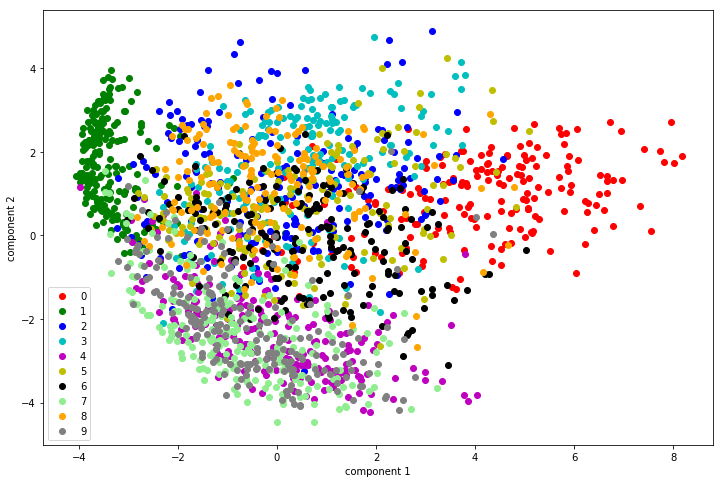

In [11]:
target_ids = range(10)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'lightgreen', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(projected[y == i, 0], projected[y == i, 1], c=c, label=label)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend()
plt.show()

Dimension reduction can be used to overcome the so called Curse of Dimensionality. In this case it can be seen, that this representation of a PCA using two principal components on MNIST does a good job on improving the data in its feature space. The digits '0' and '1' can be distinguished much better in this representation. Some other digits, however, overlap strongly in this two dimensional representation. Loosing a PCA with more than two components, which looses less information of the original data, might be a better choice in this case. 



## Use t-SNE on MNIST data

Lets see, what job the t-SNE does on this MNIST dataset. Again let us use the scikit-learn implementation of the PCA.

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [13]:
X_2d = tsne.fit_transform(X)

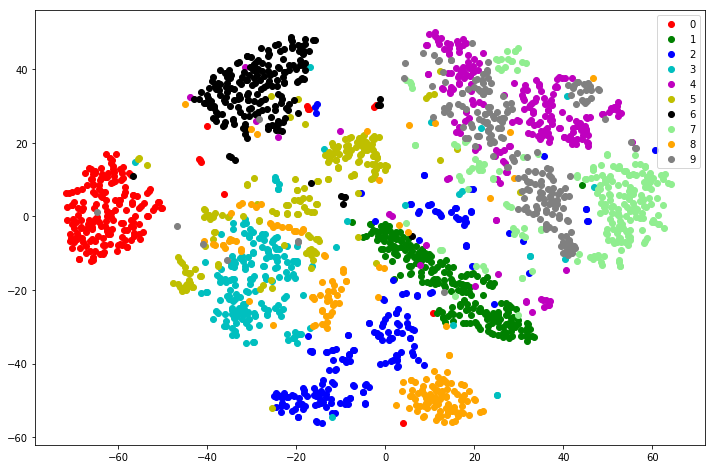

In [14]:
target_ids = range(10)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'lightgreen', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

The t-SNE has reduced the amount of noice evem more than the proposed PCA, showing a clearer visual for the different digits. Still some dots of the digits '4' and '9' overlap. They seem to have more similarities, than other digits. 